<a href="https://colab.research.google.com/github/Mohamed-Maher5/Supervised-Machine-Learning/blob/main/Classification%20RandomForest%20and%20Xgboost/RandomForest_and_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

## Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score

## Models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

## XGBoost
import xgboost as xgb

**Study the dataset**

In [ ]:
file_path = '/content/cancer_patient_data_sets.csv'
cancer_patient_dataset = pd.read_csv(file_path)

In [ ]:
cancer_patient_dataset.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
## check the info (nulls and datatypes)
cancer_patient_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
## some statistics of the dataset
cancer_patient_dataset.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
## check the nulls
cancer_patient_dataset.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
level_values = cancer_patient_dataset['Level'].value_counts()
level_values

High      365
Medium    332
Low       303
Name: Level, dtype: int64

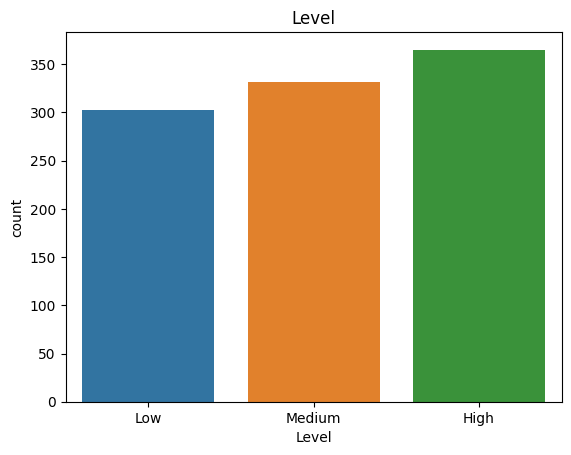

In [ ]:
sns.countplot(data=cancer_patient_dataset, x='Level')
plt.title('Level')
plt.show()

It shows the number of data points that fall within each bin --



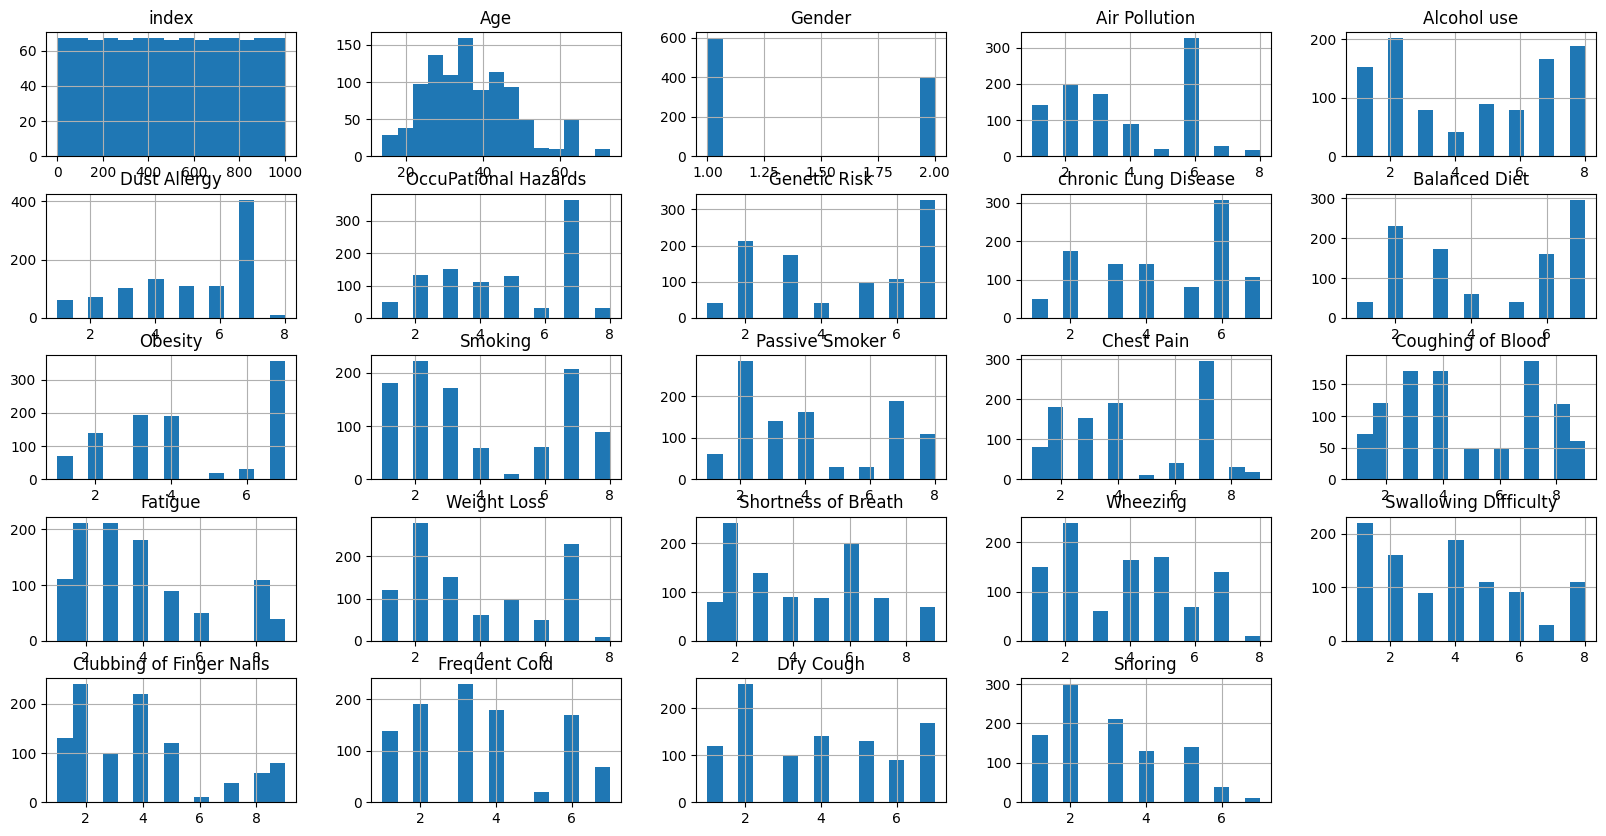

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
cancer_patient_dataset.hist(bins=15, figsize=(20,10))
plt.show()

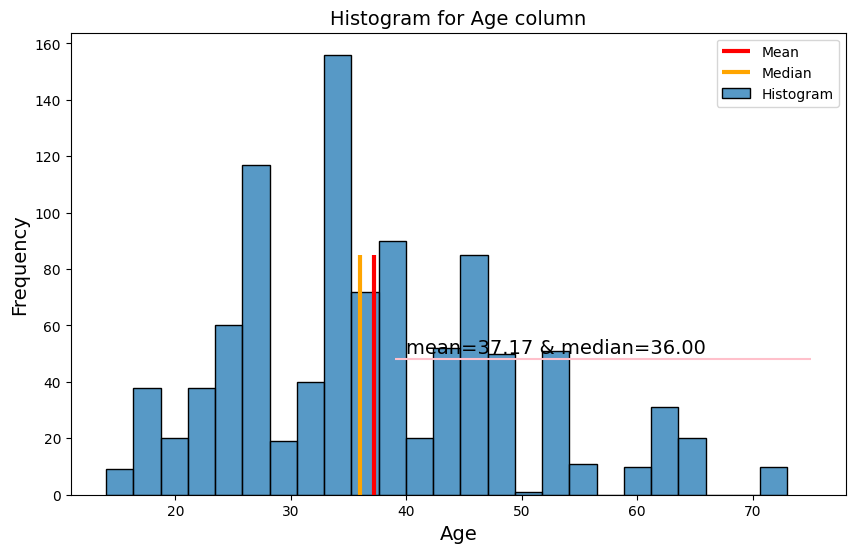

In [ ]:
## Histogram of Age column using bins=25

age_mean = cancer_patient_dataset['Age'].mean()
age_median = cancer_patient_dataset['Age'].median()

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=cancer_patient_dataset, bins=25, label='Histogram')
plt.vlines(age_mean, ymin=0, ymax=85, color='red', linewidth=3, label='Mean')
plt.vlines(age_median, ymin=0, ymax=85, color='orange', linewidth=3, label='Median')
plt.text(s=f'mean={age_mean:.2f} & median={age_median:.2f}', x=40, y=50, color='k', fontsize=14)
plt.hlines(y=48, xmin=39, xmax=75, color='pink')

plt.title('Histogram for Age column', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Smoking'>

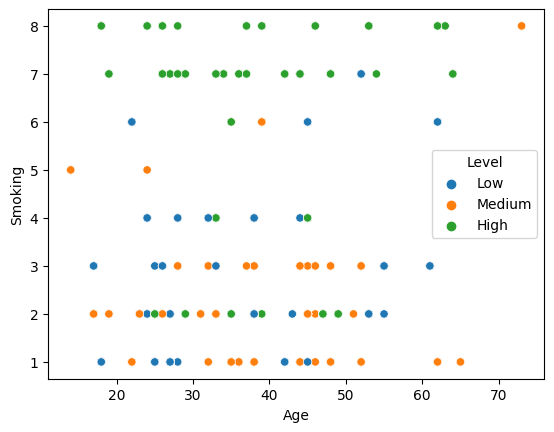

In [ ]:
# Create the scatter plot
sns.scatterplot(x=cancer_patient_dataset['Age'], y=cancer_patient_dataset['Smoking'], hue=cancer_patient_dataset['Level'])

In [ ]:
cancer_patient_dataset = cancer_patient_dataset.drop(['index','Patient Id'],axis=1)

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()
cancer_patient_dataset['Level'] = le.fit_transform(cancer_patient_dataset['Level'])

**Check the Correlation between the Features and the Target**

In [ ]:
## Correlations
cancer_patient_dataset.corr()['Level'].sort_values(ascending=False)

Level                       1.000000
Wheezing                    0.167773
Clubbing of Finger Nails    0.116746
Gender                      0.086222
Age                         0.042631
Snoring                     0.014280
Swallowing Difficulty      -0.012880
Weight Loss                -0.020537
Shortness of Breath        -0.140178
Frequent Cold              -0.171678
Dry Cough                  -0.228720
Dust Allergy               -0.264926
OccuPational Hazards       -0.363748
Fatigue                    -0.403276
Genetic Risk               -0.423382
chronic Lung Disease       -0.432405
Alcohol use                -0.434071
Chest Pain                 -0.494704
Obesity                    -0.561961
Air Pollution              -0.577269
Smoking                    -0.611087
Balanced Diet              -0.618781
Coughing of Blood          -0.631118
Passive Smoker             -0.638409
Name: Level, dtype: float64

In [ ]:
## heatmap to explain the corelations more
plt.figure(figsize=(22, 10))
sns.heatmap(cancer_patient_dataset.corr(), annot=True, cmap='magma')
plt.show()

**Split the Dataset**

In [ ]:
## Split the dataset into features and target
X = cancer_patient_dataset.drop(columns=['Level'], axis=1)  ## features
y = cancer_patient_dataset['Level']  ## target

In [ ]:
## Split Data into Train_Full and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

**PreProcessing Data**

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

**Model Selection**

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=3, max_leaf_nodes=20, criterion='gini', max_features=1.0, max_samples=0.8)
forest_clf.fit(X_train, y_train)

In [ ]:
## Prediction
y_pred = forest_clf.predict(X_train)
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=forest_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

In [ ]:
# Make predictions
predictions = forest_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

In [ ]:
xgb_clf = xgb.XGBClassifier(objective='multi:softprob',learning_rate=0.01,n_estimators=50,use_label_encoder=False,)
xgb_clf.fit(X_train, y_train)

In [ ]:
## Prediction
y_pred = xgb_clf.predict(X_train)
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=xgb_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

In [ ]:
# Make predictions
predictions = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

**Choose the Best Classifier for each prediction**

In [ ]:
voting_clf = VotingClassifier(estimators=[
                                ('rf', forest_clf),
                                ('xgb', xgb_clf)
                                    ],
                              voting='hard'
                            )
voting_clf.fit(X_train, y_train)

In [ ]:
## Prediction
y_pred = voting_clf.predict(X_train)
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=voting_clf, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

**Evaluate the Model**

In [ ]:
# Make predictions
predictions = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=False,ax=ax)